## Import Basic Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
data= pd.read_csv('Covid_Data.csv',low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562295 entries, 0 to 562294
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   case_month                       562295 non-null  object 
 1   res_state                        562247 non-null  object 
 2   state_fips_code                  562247 non-null  float64
 3   res_county                       516521 non-null  object 
 4   county_fips_code                 516521 non-null  float64
 5   age_group                        550465 non-null  object 
 6   sex                              531990 non-null  object 
 7   race                             480132 non-null  object 
 8   ethnicity                        470677 non-null  object 
 9   case_positive_specimen_interval  438540 non-null  float64
 10  case_onset_interval              508092 non-null  float64
 11  process                          562295 non-null  object 
 12  ex

In [4]:
data.head()

case_month res_state  state_fips_code res_county  county_fips_code  \
0    2020-05        TN             47.0        NaN               NaN   
1    2021-09        TN             47.0        NaN               NaN   
2    2021-05        TN             47.0        NaN               NaN   
3    2020-03        CA              6.0  SAN DIEGO            6073.0   
4    2021-09        TN             47.0        NaN               NaN   

        age_group     sex   race            ethnicity  \
0  18 to 49 years    Male  White  Non-Hispanic/Latino   
1  50 to 64 years  Female  White  Non-Hispanic/Latino   
2  18 to 49 years  Female  White  Non-Hispanic/Latino   
3       65+ years    Male  White  Non-Hispanic/Latino   
4       65+ years  Female  White  Non-Hispanic/Latino   

   case_positive_specimen_interval  case_onset_interval              process  \
0                              1.0                  0.0             Multiple   
1                              0.0                  0.0  Clinical evaluation   
2                              1.0                  0.0  Clinical evaluation   
3                              1.0                  0.0              Unknown   
4                              1.0                  0.0  Clinical evaluation   

  exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
0         Yes  Laboratory-confirmed case    Symptomatic       No       No   
1         Yes              Probable Case    Symptomatic       No  Missing   
2         Yes              Probable Case    Symptomatic       No       No   
3     Unknown  Laboratory-confirmed case    Symptomatic       No  Missing   
4         Yes  Laboratory-confirmed case    Symptomatic  Unknown  Missing   

  death_yn underlying_conditions_yn  
0       No                      Yes  
1       No                      Yes  
2       No                      Yes  
3      NaN                      Yes  
4       No                      Yes

In [5]:
# moving target variable to end of index
data = data.reindex(columns = [col for col in data.columns if col != 'hosp_yn'] + ['hosp_yn'])
data

case_month res_state  state_fips_code res_county  county_fips_code  \
0         2020-05        TN             47.0        NaN               NaN   
1         2021-09        TN             47.0        NaN               NaN   
2         2021-05        TN             47.0        NaN               NaN   
3         2020-03        CA              6.0  SAN DIEGO            6073.0   
4         2021-09        TN             47.0        NaN               NaN   
...           ...       ...              ...        ...               ...   
562290    2021-11        NV             32.0        NaN               NaN   
562291    2021-11        NV             32.0        NaN               NaN   
562292    2021-11        NV             32.0        NaN               NaN   
562293    2021-11        NV             32.0        NaN               NaN   
562294    2021-12        TN             47.0        NaN               NaN   

             age_group     sex   race            ethnicity  \
0       18 to 49 years    Male  White  Non-Hispanic/Latino   
1       50 to 64 years  Female  White  Non-Hispanic/Latino   
2       18 to 49 years  Female  White  Non-Hispanic/Latino   
3            65+ years    Male  White  Non-Hispanic/Latino   
4            65+ years  Female  White  Non-Hispanic/Latino   
...                ...     ...    ...                  ...   
562290  50 to 64 years    Male  White  Non-Hispanic/Latino   
562291  50 to 64 years    Male  White  Non-Hispanic/Latino   
562292  50 to 64 years    Male  White  Non-Hispanic/Latino   
562293  50 to 64 years    Male  White  Non-Hispanic/Latino   
562294  50 to 64 years    Male  White  Non-Hispanic/Latino   

        case_positive_specimen_interval  case_onset_interval  \
0                                   1.0                  0.0   
1                                   0.0                  0.0   
2                                   1.0                  0.0   
3                                   1.0                  0.0   
4                                   1.0                  0.0   
...                                 ...                  ...   
562290                              1.0                  0.0   
562291                              0.0                  NaN   
562292                              0.0                  0.0   
562293                              0.0                  0.0   
562294                              NaN                  0.0   

                     process exposure_yn             current_status  \
0                   Multiple         Yes  Laboratory-confirmed case   
1        Clinical evaluation         Yes              Probable Case   
2        Clinical evaluation         Yes              Probable Case   
3                    Unknown     Unknown  Laboratory-confirmed case   
4        Clinical evaluation         Yes  Laboratory-confirmed case   
...                      ...         ...                        ...   
562290  Routine surveillance         Yes  Laboratory-confirmed case   
562291  Routine surveillance         Yes  Laboratory-confirmed case   
562292   Clinical evaluation         Yes  Laboratory-confirmed case   
562293  Routine surveillance         Yes              Probable Case   
562294   Clinical evaluation         Yes  Laboratory-confirmed case   

       symptom_status   icu_yn death_yn underlying_conditions_yn  hosp_yn  
0         Symptomatic       No       No                      Yes       No  
1         Symptomatic  Missing       No                      Yes       No  
2         Symptomatic       No       No                      Yes       No  
3         Symptomatic  Missing      NaN                      Yes       No  
4         Symptomatic  Missing       No                      Yes  Unknown  
...               ...      ...      ...                      ...      ...  
562290    Symptomatic  Missing       No                      Yes       No  
562291    Symptomatic  Missing       No                      Yes       No  
562292    Symptomatic  Missing 

In [6]:
# looking at missing values
data.isnull().sum()

case_month                              0
res_state                              48
state_fips_code                        48
res_county                          45774
county_fips_code                    45774
age_group                           11830
sex                                 30305
race                                82163
ethnicity                           91618
case_positive_specimen_interval    123755
case_onset_interval                 54203
process                                 0
exposure_yn                             0
current_status                          0
symptom_status                          0
icu_yn                                  0
death_yn                            42927
underlying_conditions_yn                0
hosp_yn                                 0
dtype: int64

In [7]:
# Remove not needed columns
data1 = data.copy()
data1.drop(columns=['state_fips_code','ethnicity','res_county','county_fips_code'],inplace=True)

In [8]:
# Replace Missing,nan, and Unknown as NaN to be able to drop later
# Replacing Na values with the mean or mode depending on variable
data1['exposure_yn'] = data1['exposure_yn'].replace(['Unknown'],'Other')
data1['race'] = data1['race'].replace(['Multiple/Other'],'Other')
data1['race'] = data1['race'].fillna('Other')
data1['process'] = data1['process'].replace(['Unknown'],'Other')
data1.replace(('Missing','nan','NA','Unknown'), (np.NaN), inplace=True)
data1['case_onset_interval'] = data1['case_onset_interval'].fillna(data1['case_onset_interval'].mean())
data1['case_positive_specimen_interval'] = data1['case_positive_specimen_interval'].fillna(data1['case_positive_specimen_interval'].mean())
data1['symptom_status'] = data1['symptom_status'].fillna(data1['symptom_status'].mode())
data1=data1[data1.sex != 'Other']

In [9]:
# looking at percentage of missing values per variable
def missing(data1):
    print("Missing values in %")
    print(round((data1.isnull().sum() * 100/ len(data1)),2).sort_values(ascending=False))
missing(data1)

Missing values in %
icu_yn                             46.69
death_yn                           15.59
sex                                 5.49
race                                3.47
hosp_yn                             3.13
age_group                           2.10
symptom_status                      1.01
res_state                           0.01
case_month                          0.00
case_positive_specimen_interval     0.00
case_onset_interval                 0.00
process                             0.00
exposure_yn                         0.00
current_status                      0.00
underlying_conditions_yn            0.00
dtype: float64


In [10]:
# drop withs that contain NaN
data1.dropna(inplace=True)

In [11]:
data1.isnull().sum()

case_month                         0
res_state                          0
age_group                          0
sex                                0
race                               0
case_positive_specimen_interval    0
case_onset_interval                0
process                            0
exposure_yn                        0
current_status                     0
symptom_status                     0
icu_yn                             0
death_yn                           0
underlying_conditions_yn           0
hosp_yn                            0
dtype: int64

In [12]:
data1['icu_yn'].value_counts()

No     223322
Yes      6569
Name: icu_yn, dtype: int64

In [13]:
data1['case_positive_specimen_interval'].value_counts()

 0.000000     115056
 0.303995      70092
 1.000000      36842
 2.000000       4207
-1.000000       1001
               ...  
 66.000000         1
-77.000000         1
-68.000000         1
 82.000000         1
-53.000000         1
Name: case_positive_specimen_interval, Length: 151, dtype: int64

In [14]:
# Values should only be positive not negative so switching those mistakenly negative values to the positive version
data1['case_positive_specimen_interval'] = data1['case_positive_specimen_interval'].abs()

In [15]:
data1['case_positive_specimen_interval'].value_counts()

0.000000      115056
0.303995       70092
1.000000       37843
2.000000        4384
3.000000         905
               ...  
91.000000          1
82.000000          1
97.000000          1
104.000000         1
90.000000          1
Name: case_positive_specimen_interval, Length: 83, dtype: int64

In [16]:
data1['death_yn'].value_counts()

No     225345
Yes      4546
Name: death_yn, dtype: int64

In [17]:
print(data.shape)
print(data1.shape)
print( 'number of observations removed after cleaning:', data.shape[0]-data1.shape[0])
print( 'number of columns removed after cleaning:', data.shape[1]-data1.shape[1])

(562295, 19)
(229891, 15)
number of observations removed after cleaning: 332404
number of columns removed after cleaning: 4


In [18]:
data1['exposure_yn'].value_counts()

Yes      175012
Other     54879
Name: exposure_yn, dtype: int64

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229891 entries, 0 to 562281
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   case_month                       229891 non-null  object 
 1   res_state                        229891 non-null  object 
 2   age_group                        229891 non-null  object 
 3   sex                              229891 non-null  object 
 4   race                             229891 non-null  object 
 5   case_positive_specimen_interval  229891 non-null  float64
 6   case_onset_interval              229891 non-null  float64
 7   process                          229891 non-null  object 
 8   exposure_yn                      229891 non-null  object 
 9   current_status                   229891 non-null  object 
 10  symptom_status                   229891 non-null  object 
 11  icu_yn                           229891 non-null  object 
 12  de

In [20]:
# rename columns
data2 = data1.copy()
data2.rename(columns={'case_month':'date','res_state':'state','process':'identified_by','exposure_yn':'exposure','hosp_yn':'hospitalized','icu_yn':'icu_needed','death_yn':'patient_died','underlying_conditions_yn':'underlying_conditions'},inplace=True)

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229891 entries, 0 to 562281
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   date                             229891 non-null  object 
 1   state                            229891 non-null  object 
 2   age_group                        229891 non-null  object 
 3   sex                              229891 non-null  object 
 4   race                             229891 non-null  object 
 5   case_positive_specimen_interval  229891 non-null  float64
 6   case_onset_interval              229891 non-null  float64
 7   identified_by                    229891 non-null  object 
 8   exposure                         229891 non-null  object 
 9   current_status                   229891 non-null  object 
 10  symptom_status                   229891 non-null  object 
 11  icu_needed                       229891 non-null  object 
 12  pa

In [22]:
data2['date'] = pd.to_datetime(data2['date'])

In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229891 entries, 0 to 562281
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             229891 non-null  datetime64[ns]
 1   state                            229891 non-null  object        
 2   age_group                        229891 non-null  object        
 3   sex                              229891 non-null  object        
 4   race                             229891 non-null  object        
 5   case_positive_specimen_interval  229891 non-null  float64       
 6   case_onset_interval              229891 non-null  float64       
 7   identified_by                    229891 non-null  object        
 8   exposure                         229891 non-null  object        
 9   current_status                   229891 non-null  object        
 10  symptom_status                   229891 non-

In [24]:
data2.age_group.unique()

array(['18 to 49 years', '0 - 17 years', '50 to 64 years', '65+ years'],
      dtype=object)

In [25]:
data2.describe()

case_positive_specimen_interval  case_onset_interval
count                    229891.000000        229891.000000
mean                          0.423090             0.143692
std                           2.045265             1.749048
min                           0.000000             0.000000
25%                           0.000000             0.000000
50%                           0.000000             0.000000
75%                           0.303995             0.000000
max                         104.000000           104.000000

## EDA of Variables

### Categorical Variables

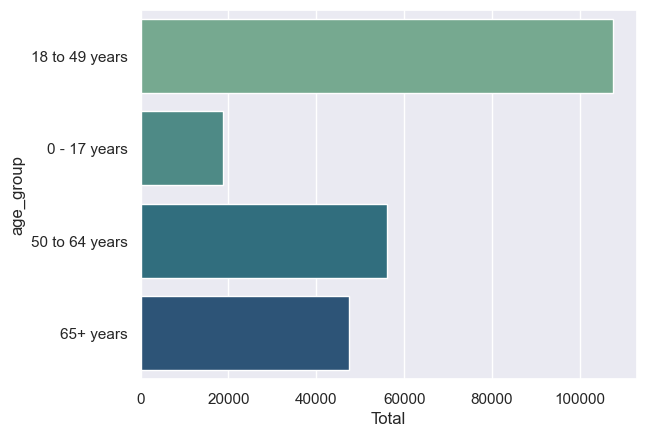

In [26]:
sns.set_theme(style='darkgrid')
sns.countplot(y='age_group', data=data2, palette='crest')
plt.ylabel('age_group')
plt.xlabel('Total')
plt.show()

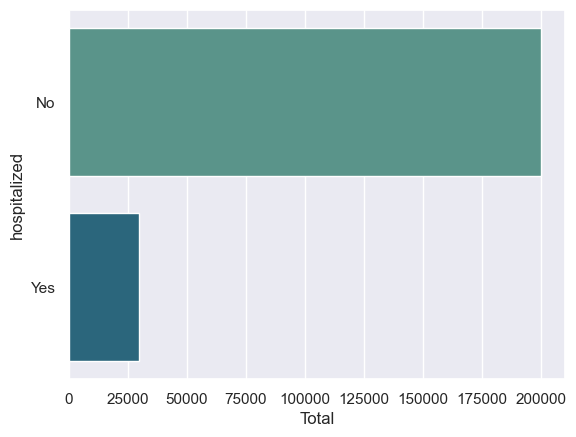

In [27]:
sns.set_theme(style='darkgrid')
sns.countplot(y='hospitalized', data=data2, palette='crest')
plt.ylabel('hospitalized')
plt.xlabel('Total')
plt.show()

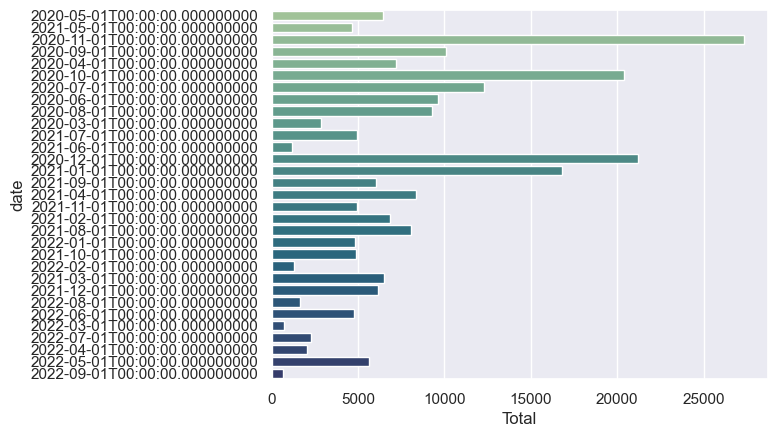

In [28]:
sns.set_theme(style='darkgrid')
sns.countplot(y='date', data=data2, palette='crest')
plt.ylabel('date')
plt.xlabel('Total')
plt.show()

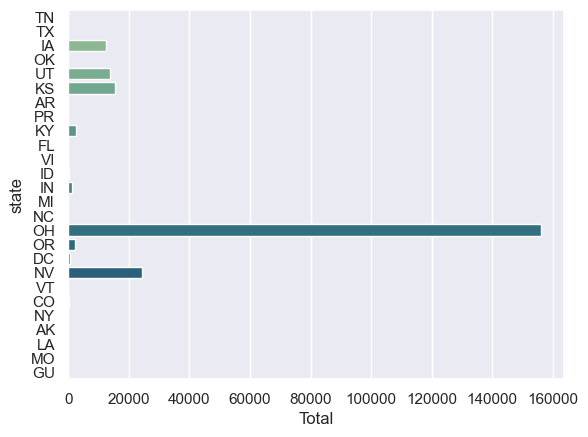

In [29]:
sns.set_theme(style='darkgrid')
sns.countplot(y='state', data=data2, palette='crest')
plt.ylabel('state')
plt.xlabel('Total')
plt.show()

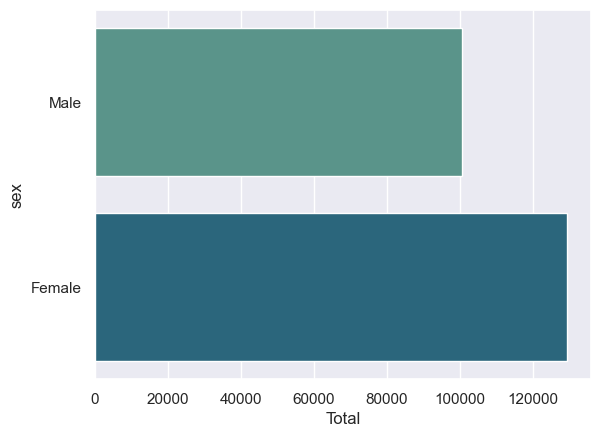

In [30]:
sns.set_theme(style='darkgrid')
sns.countplot(y='sex', data=data2, palette='crest')
plt.ylabel('sex')
plt.xlabel('Total')
plt.show()

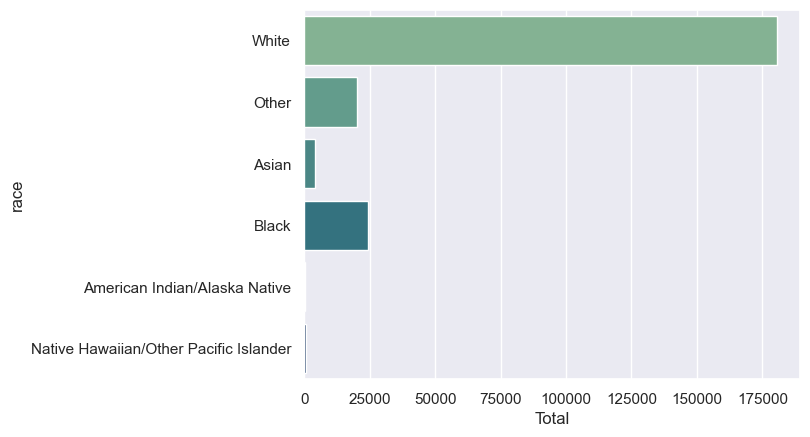

In [31]:
sns.set_theme(style='darkgrid')
sns.countplot(y='race', data=data2, palette='crest')
plt.ylabel('race')
plt.xlabel('Total')
plt.show()

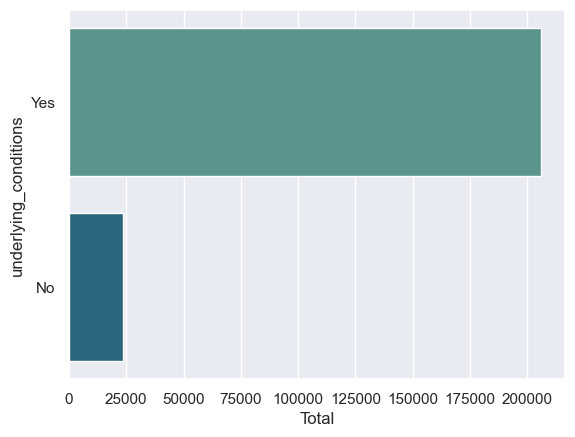

In [32]:
sns.set_theme(style='darkgrid')
sns.countplot(y='underlying_conditions', data=data2, palette='crest')
plt.ylabel('underlying_conditions')
plt.xlabel('Total')
plt.show()

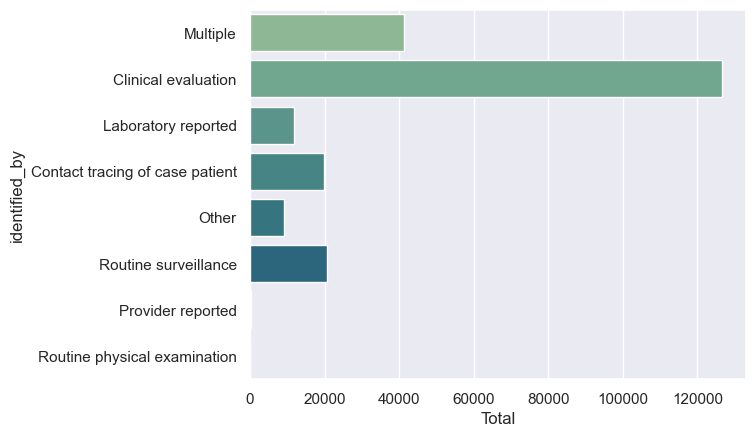

In [33]:
sns.set_theme(style='darkgrid')
ax= sns.countplot(y='identified_by', data=data2, palette='crest')
plt.ylabel('identified_by')
plt.xlabel('Total')
plt.show()

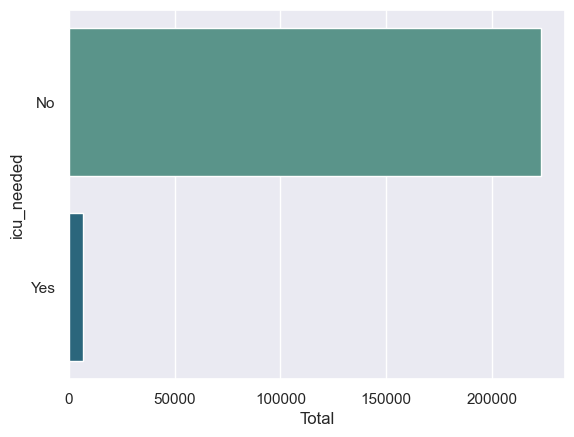

In [34]:
sns.set_theme(style='darkgrid')
sns.countplot(y='icu_needed', data=data2, palette='crest')
plt.ylabel('icu_needed')
plt.xlabel('Total')
plt.show()

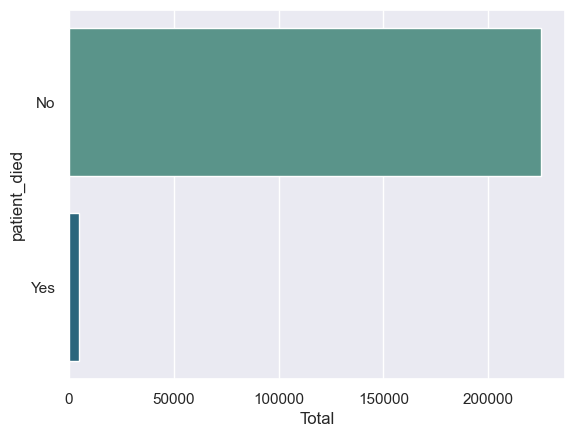

In [35]:
sns.set_theme(style='darkgrid')
sns.countplot(y='patient_died', data=data2, palette='crest')
plt.ylabel('patient_died')
plt.xlabel('Total')
plt.show()

### Numerical Variables

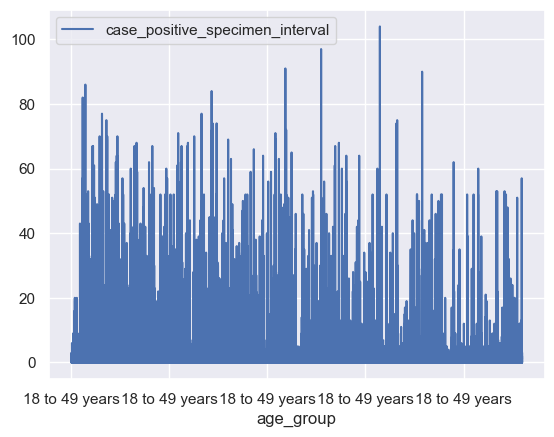

In [36]:
import matplotlib.pyplot as plt
data2.plot(x="age_group", y=["case_positive_specimen_interval"])
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age_group', ylabel='case_positive_specimen_interval'>

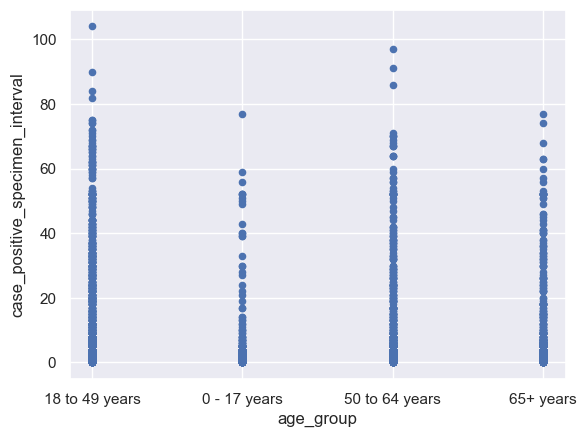

In [37]:
data2.plot(x='age_group',y='case_positive_specimen_interval',kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hospitalized', ylabel='case_positive_specimen_interval'>

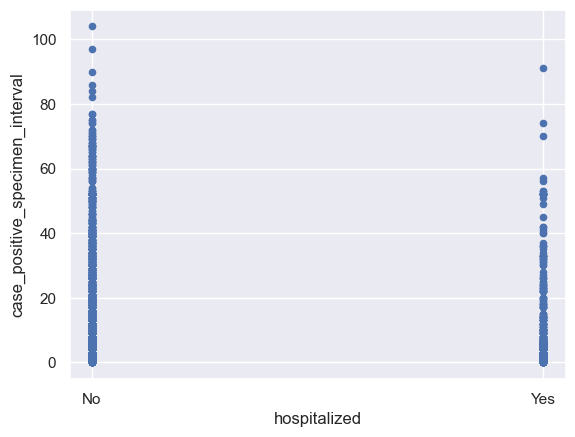

In [38]:
data2.plot(x='hospitalized',y='case_positive_specimen_interval',kind='scatter')

### Removing Outliers in Numeric Variables

In [39]:
def outlier_removal(data2, variable):
    upper_limit = data2['case_positive_specimen_interval'].mean() + 3 * data2[variable].std()
    lower_limit = data2['case_positive_specimen_interval'].mean() - 3 * data2[variable].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(data2, "case_positive_specimen_interval")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  6.55888452361346
Lower Limit:  -5.712704179307225


In [40]:
data2[(data2['case_positive_specimen_interval'] < lower_limit) | (data2['case_positive_specimen_interval'] > upper_limit)]

date state       age_group     sex   race  \
1385   2020-03-01    IA  18 to 49 years    Male  White   
2433   2020-10-01    IA  18 to 49 years  Female  White   
2593   2020-10-01    IA  50 to 64 years    Male  White   
2600   2020-10-01    IA  50 to 64 years    Male  White   
2618   2020-10-01    IA  50 to 64 years    Male  White   
...           ...   ...             ...     ...    ...   
558153 2021-01-01    NV  50 to 64 years    Male  White   
558365 2021-01-01    NV       65+ years    Male  White   
559313 2020-07-01    NV  18 to 49 years  Female  White   
560042 2021-10-01    NV  18 to 49 years  Female  Black   
561071 2020-12-01    NV       65+ years  Female  White   

        case_positive_specimen_interval  case_onset_interval  \
1385                                9.0                  0.0   
2433                               16.0                  0.0   
2593                               20.0                  0.0   
2600                               13.0                  0.0   
2618                                9.0                  0.0   
...                                 ...                  ...   
558153                             12.0                  0.0   
558365                              7.0                  0.0   
559313                             12.0                  0.0   
560042                             13.0                  0.0   
561071                             57.0                  0.0   

               identified_by exposure             current_status  \
1385     Clinical evaluation    Other  Laboratory-confirmed case   
2433     Clinical evaluation    Other  Laboratory-confirmed case   
2593     Clinical evaluation      Yes  Laboratory-confirmed case   
2600     Clinical evaluation    Other  Laboratory-confirmed case   
2618    Routine surveillance    Other  Laboratory-confirmed case   
...                      ...      ...                        ...   
558153  Routine surveillance      Yes  Laboratory-confirmed case   
558365  Routine surveillance      Yes  Laboratory-confirmed case   
559313  Routine surveillance      Yes  Laboratory-confirmed case   
560042              Multiple      Yes  Laboratory-confirmed case   
561071              Multiple      Yes  Laboratory-confirmed case   

       symptom_status icu_needed patient_died underlying_conditions  \
1385      Symptomatic         No           No                   Yes   
2433      Symptomatic         No           No                   Yes   
2593      Symptomatic         No           No                   Yes   
2600      Symptomatic         No           No                   Yes   
2618      Symptomatic         No           No                   Yes   
...               ...        ...          ...                   ...   
558153    Symptomatic         No           No                   Yes   
558365    Symptomatic         No           No                   Yes   
559313    Symptomatic         No           No                   Yes   
560042    Symptomatic         No           No                   Yes   
561071    Symptomatic         No           No                   Yes   

       hospitalized  
1385             No  
2433             No  
2593             No  
2600             No  
2618             No  
...             ...  
558153           No  
558365           No  
559313          Yes  
560042           No  
561071           No  

[845 rows x 15 columns]

In [41]:
data3 = data2[(data2['case_positive_specimen_interval'] > lower_limit) & (data2['case_positive_specimen_interval'] < upper_limit)]

In [42]:
def outlier_removal(data3, variable):
    upper_limit = data3['case_onset_interval'].mean() + 3 * data3[variable].std()
    lower_limit = data3['case_onset_interval'].mean() - 3 * data3[variable].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(data3, "case_onset_interval")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  5.045180992181303
Lower Limit:  -4.7763038558672815


In [43]:
data3[(data3['case_positive_specimen_interval'] < lower_limit) | (data3['case_positive_specimen_interval'] > upper_limit)]

date state       age_group     sex   race  \
531    2020-07-01    IA  50 to 64 years    Male  White   
4462   2020-08-01    IA  18 to 49 years  Female  White   
41566  2021-07-01    OH  18 to 49 years  Female  White   
57088  2021-02-01    OH  18 to 49 years  Female  White   
61800  2020-06-01    OR  18 to 49 years  Female  White   
...           ...   ...             ...     ...    ...   
553551 2020-09-01    NV       65+ years    Male  White   
558298 2021-01-01    NV       65+ years    Male  White   
560503 2020-07-01    NV       65+ years  Female  Other   
561111 2021-02-01    NV       65+ years  Female  White   
561182 2021-06-01    NV    0 - 17 years    Male  White   

        case_positive_specimen_interval  case_onset_interval  \
531                                 6.0                  0.0   
4462                                6.0                  2.0   
41566                               6.0                  0.0   
57088                               6.0                  0.0   
61800                               6.0                  0.0   
...                                 ...                  ...   
553551                              6.0                  0.0   
558298                              6.0                  0.0   
560503                              6.0                  0.0   
561111                              6.0                  0.0   
561182                              6.0                  0.0   

                          identified_by exposure             current_status  \
531                 Clinical evaluation      Yes  Laboratory-confirmed case   
4462    Contact tracing of case patient      Yes              Probable Case   
41566   Contact tracing of case patient      Yes  Laboratory-confirmed case   
57088               Clinical evaluation      Yes  Laboratory-confirmed case   
61800               Laboratory reported      Yes  Laboratory-confirmed case   
...                                 ...      ...                        ...   
553551             Routine surveillance      Yes  Laboratory-confirmed case   
558298             Routine surveillance      Yes  Laboratory-confirmed case   
560503                         Multiple      Yes  Laboratory-confirmed case   
561111                         Multiple      Yes  Laboratory-confirmed case   
561182                         Multiple      Yes  Laboratory-confirmed case   

       symptom_status icu_needed patient_died underlying_conditions  \
531       Symptomatic         No           No                   Yes   
4462      Symptomatic         No           No                   Yes   
41566     Symptomatic         No           No                   Yes   
57088     Symptomatic         No           No                   Yes   
61800     Symptomatic         No           No                   Yes   
...               ...        ...          ...                   ...   
553551    Symptomatic        Yes          Yes                   Yes   
558298    Symptomatic         No           No                   Yes   
560503    Symptomatic         No           No                   Yes   
561111    Symptomatic         No           No                   Yes   
561182    Symptomatic         No           No                   Yes   

       hospitalized  
531              No  
4462             No  
41566            No  
57088            No  
61800           Yes  
...             ...  
553551          Yes  
558298           No  
560503           No  
561111          Yes  
561182           No  

[81 rows x 15 columns]

In [44]:
data3 = data3[(data3['case_positive_specimen_interval'] > lower_limit) & (data3['case_positive_specimen_interval'] < upper_limit)]

In [45]:
# looking at number of outliers removed
print(data2.shape)
print(data3.shape)

(229891, 15)
(228965, 15)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age_group', ylabel='case_onset_interval'>

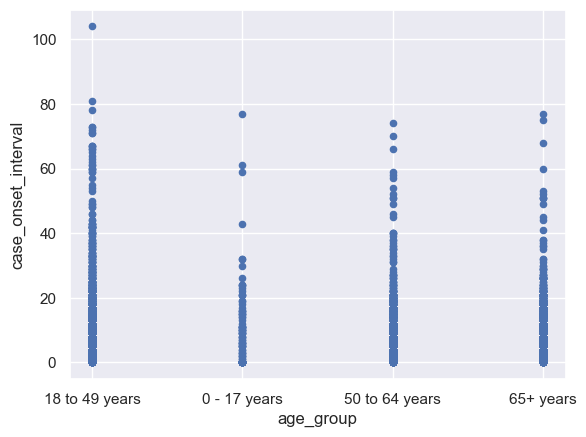

In [46]:
data2.plot(x='age_group',y='case_onset_interval',kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age_group', ylabel='case_onset_interval'>

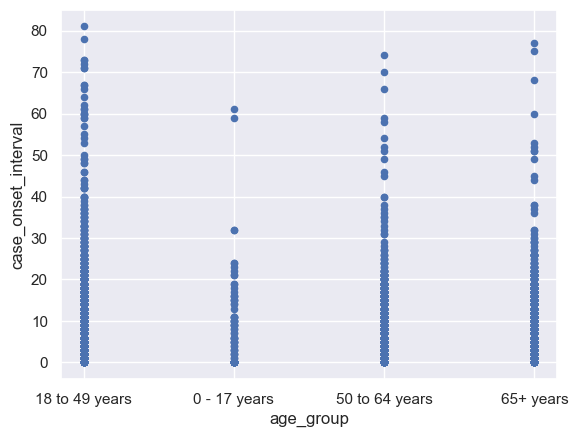

In [47]:
data3.plot(x='age_group',y='case_onset_interval',kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hospitalized', ylabel='case_onset_interval'>

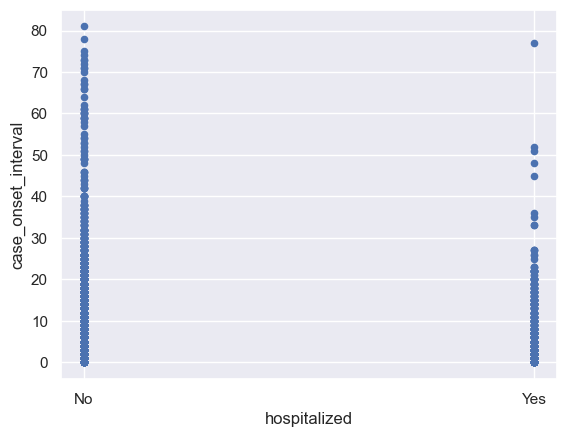

In [48]:
data3.plot(x='hospitalized',y='case_onset_interval',kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hospitalized', ylabel='case_positive_specimen_interval'>

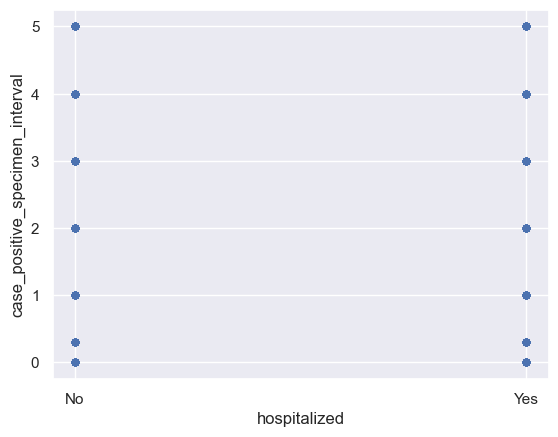

In [49]:
data3.plot(x='hospitalized',y='case_positive_specimen_interval',kind='scatter')

c:\Users\Khan-\anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='case_positive_specimen_interval'>

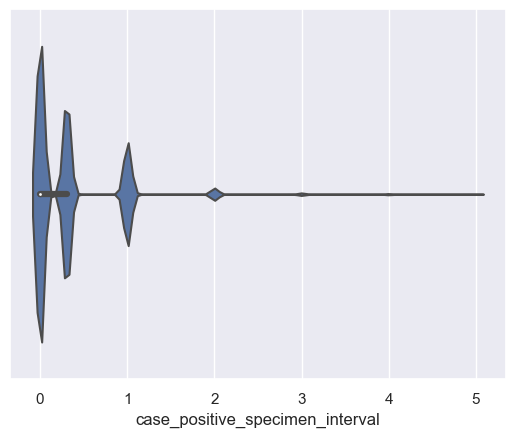

In [50]:
import seaborn
seaborn.set(style='darkgrid')
sns.violinplot(data3['case_positive_specimen_interval'])

In [51]:
# plotting the scatter chart
import plotly.express as px
import pandas as pd
fig = px.histogram(data3, x='case_positive_specimen_interval', color='sex')
 
# showing the plot
fig.show()

c:\Users\Khan-\anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='case_onset_interval'>

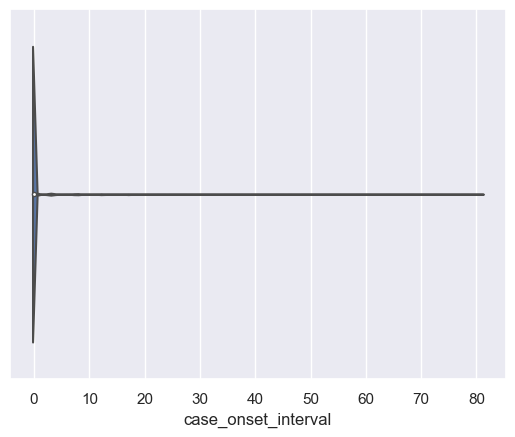

In [52]:
seaborn.set(style='darkgrid')
sns.violinplot(data3['case_onset_interval'])

### Correlation of Variables

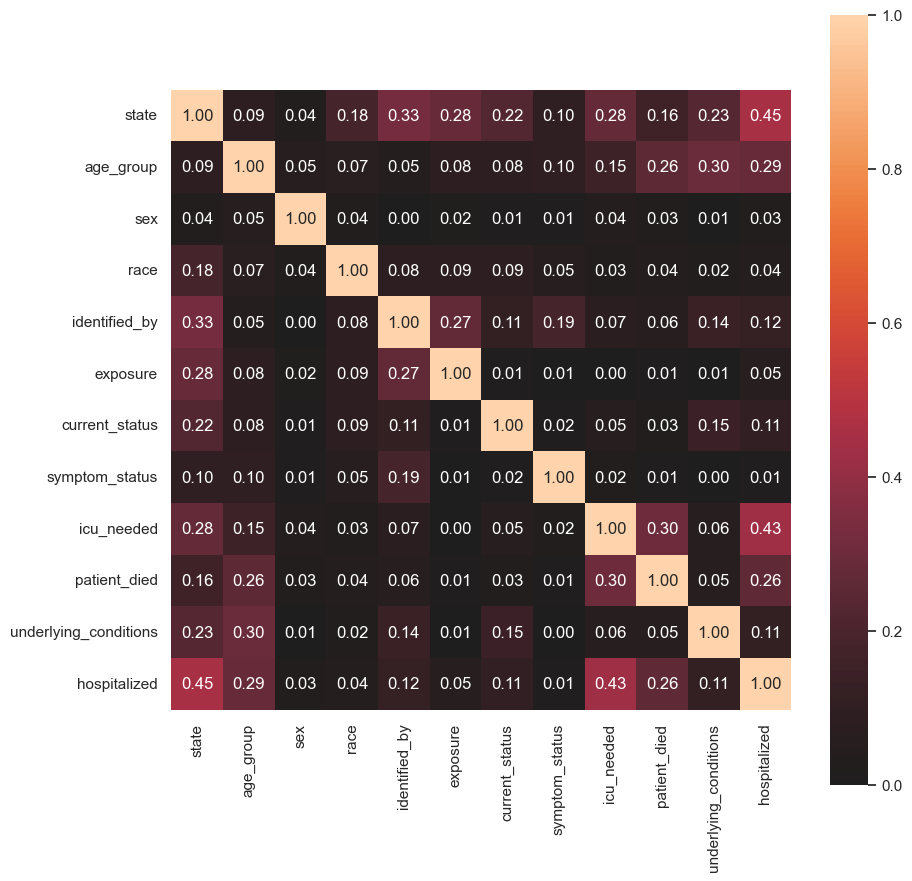

In [53]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(data3)
categorical_features
selected_column= data2[categorical_features]
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

In [54]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data3, title="Hospitalization Report")
profile.to_file("Hosp_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Khan-\anaconda3\envs\minimal_ds\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning:

overflow encountered in longlong_scalars



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
profile

In [56]:
import sweetviz as sv
analyze_report = sv.analyze(data2)
analyze_report.show_html('report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated.


Looking at age to hospitalized

In [57]:
pd.crosstab(data3.age_group,data2.hospitalized,margins=True).style.background_gradient(cmap='Blues')

In [58]:
pd.crosstab(data3.hospitalized,data2.state,margins=True).style.background_gradient(cmap='Blues')

In [59]:
pd.crosstab([data3.sex,data2.hospitalized],data3.age_group,margins=True).style.background_gradient(cmap='Blues')

In [60]:
all=pd.crosstab(data3.age_group,data3.hospitalized,margins=True)['All']
pd.crosstab(data3.age_group,data3.hospitalized).divide(all,axis=0).dropna()

hospitalized          No       Yes
age_group                         
0 - 17 years    0.974155  0.025845
18 to 49 years  0.936154  0.063846
50 to 64 years  0.859898  0.140102
65+ years       0.695637  0.304363

In [61]:
all=pd.crosstab(data3.hospitalized,data3.age_group,margins=True)['All']
pd.crosstab(data3.hospitalized,data3.age_group).divide(all,axis=0).dropna()

age_group     0 - 17 years  18 to 49 years  50 to 64 years  65+ years
hospitalized                                                         
No                0.091294        0.502578        0.241001   0.165127
Yes               0.016342        0.231264        0.264930   0.487464

In [62]:
child= len(data3[(data3['hospitalized']=='Yes') & (data3['age_group']=='0 - 17 years')])
num_child = len(data3[data3['age_group']=='0 - 17 years'])

youngadult = len(data3[(data3['hospitalized']=='Yes') & (data3['age_group']=='18 to 49 years')])
num_youngadult = len(data3[data3['age_group']=='18 to 49 years'])

adult = len(data3[(data3['hospitalized']=='Yes') & (data3['age_group']=='50 to 64 years')])
num_adult = len(data3[data3['age_group']=='50 to 64 years'])

elderly= len(data3[(data3['hospitalized']=='Yes') & (data3['age_group']=='65+ years')])
num_elderly = len(data3[data3['age_group']=='65+ years'])


print('Probability of child to be hospitalized:', child/num_child)
print('Probability of youngadult to be hospitalized:', youngadult/num_youngadult)
print('Probability of adult to be hospitalized:', adult/num_adult)
print('Probability of elderly to be hospitalized:', elderly/num_elderly)

Probability of child to be hospitalized: 0.025845462328767124
Probability of youngadult to be hospitalized: 0.06384628318418742
Probability of adult to be hospitalized: 0.14010163183509877
Probability of elderly to be hospitalized: 0.3043625224463927


In [63]:
df2 = data3.groupby(['sex','age_group','hospitalized']).agg({'hospitalized':'count'})
print(df2)

                                    hospitalized
sex    age_group      hospitalized              
Female 0 - 17 years   No                    8923
                      Yes                    242
       18 to 49 years No                   58473
                      Yes                   4007
       50 to 64 years No                   27089
                      Yes                   3929
       65+ years      No                   18859
                      Yes                   7156
Male   0 - 17 years   No                    9282
                      Yes                    241
       18 to 49 years No                   41746
                      Yes                   2828
       50 to 64 years No                   20969
                      Yes                   3901
       65+ years      No                   14069
                      Yes                   7251


In [64]:
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(df3)

                                    hospitalized
sex    age_group      hospitalized              
Female 0 - 17 years   No                6.934363
                      Yes               0.188066
       18 to 49 years No               45.441334
                      Yes               3.113974
       50 to 64 years No               21.051773
                      Yes               3.053358
       65+ years      No               14.655963
                      Yes               5.561168
Male   0 - 17 years   No                9.255437
                      Yes               0.240310
       18 to 49 years No               41.626532
                      Yes               2.819907
       50 to 64 years No               20.908991
                      Yes               3.889836
       65+ years      No               14.028738
                      Yes               7.230249


In [65]:
data4 = data3.copy()

In [66]:
data4['age_group'] = data4['age_group'].astype('category')
data4['age_group']=data4['age_group'].cat.set_categories(['0 - 17 years','18 to 49 years','50 to 64 years', '65+ years'], ordered=True)

encoded_categories = dict(enumerate(data4.age_group.cat.categories))
print(encoded_categories)

{0: '0 - 17 years', 1: '18 to 49 years', 2: '50 to 64 years', 3: '65+ years'}


In [67]:
data4['age_group'] = data4['age_group'].cat.codes
# data4['date'] = pd.to_datetime(data4['date'])
# data4.info()

In [68]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228965 entries, 0 to 562281
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             228965 non-null  datetime64[ns]
 1   state                            228965 non-null  object        
 2   age_group                        228965 non-null  int8          
 3   sex                              228965 non-null  object        
 4   race                             228965 non-null  object        
 5   case_positive_specimen_interval  228965 non-null  float64       
 6   case_onset_interval              228965 non-null  float64       
 7   identified_by                    228965 non-null  object        
 8   exposure                         228965 non-null  object        
 9   current_status                   228965 non-null  object        
 10  symptom_status                   228965 non-

In [69]:
for column in data4.columns:
    if data4[column].dtype == 'object':
        data4[column] = data4[column].astype('category')
        data4[column] = data4[column].cat.codes

In [70]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228965 entries, 0 to 562281
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             228965 non-null  datetime64[ns]
 1   state                            228965 non-null  int8          
 2   age_group                        228965 non-null  int8          
 3   sex                              228965 non-null  int8          
 4   race                             228965 non-null  int8          
 5   case_positive_specimen_interval  228965 non-null  float64       
 6   case_onset_interval              228965 non-null  float64       
 7   identified_by                    228965 non-null  int8          
 8   exposure                         228965 non-null  int8          
 9   current_status                   228965 non-null  int8          
 10  symptom_status                   228965 non-

In [71]:
# Hospitalized: No: 0,   Yes:1
data4.hospitalized.unique()

array([0, 1], dtype=int8)

In [72]:
 from scipy import stats
 import statistics as stat
t,p = stats.ttest_ind(data4.age_group, data4.hospitalized)
print(f't-value: {t}')
print(f'p-value: {p}')

t-value: 716.6135757323748
p-value: 0.0


In [73]:
feature = 'age_group'
target = 'hospitalized'

groups = data4[feature].unique()
grouped_values = []
for group in groups:
    grouped_values.append(data4[data4[feature]==group][target])
grouped_values

stats.f_oneway(*grouped_values)

F_onewayResult(statistic=6835.419597152017, pvalue=0.0)

In [74]:
 import pingouin as pg
# F value =
# p unc if under 0.05 has a significant influence then
aov = pg.anova(dv='hospitalized', between = 'age_group', data=data4, detailed = True)
aov

Source            SS      DF          MS            F  p-unc     np2
0  age_group   2115.834410       3  705.278137  6835.419597    0.0  0.0822
1     Within  23624.180658  228961    0.103180          NaN    NaN     NaN

In [75]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

model = ols('hospitalized ~ age_group',data=data4).fit()

aovRes = sm.stats.anova_lm(model,typ=2)
aovRes

sum_sq        df             F  PR(>F)
age_group   1948.776579       1.0  18754.708041     0.0
Residual   23791.238489  228963.0           NaN     NaN

In [77]:
from sklearn.feature_selection import chi2
X = data4.drop(['date','state','hospitalized','icu_needed','patient_died'], axis=1)
y = data4['hospitalized']

chi_scores = chi2(X,y)
chi_scores

(array([9.03015000e+03, 1.44386553e+02, 6.60532314e+01, 1.03390617e+03,
        1.06873555e+02, 2.56223566e-02, 1.51475992e+02, 2.25511445e+03,
        1.64650165e+00, 3.00508235e+02]),
 array([0.00000000e+000, 2.92467534e-033, 4.38907680e-016, 7.66316067e-227,
        4.74498259e-025, 8.72826052e-001, 8.24808449e-035, 0.00000000e+000,
        1.99435745e-001, 2.55296178e-067]))

<AxesSubplot:>

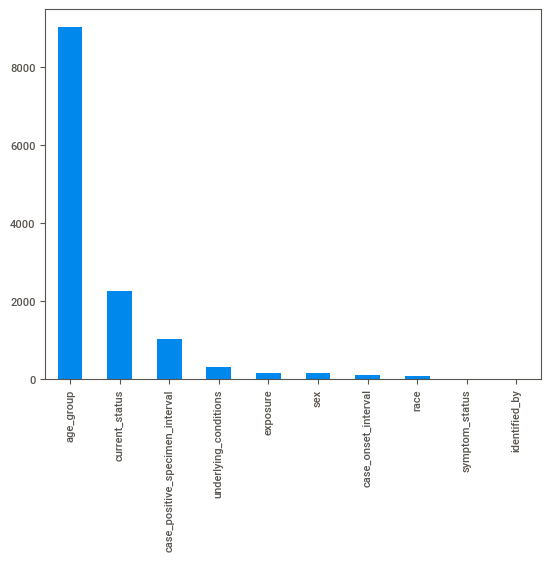

In [78]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<AxesSubplot:>

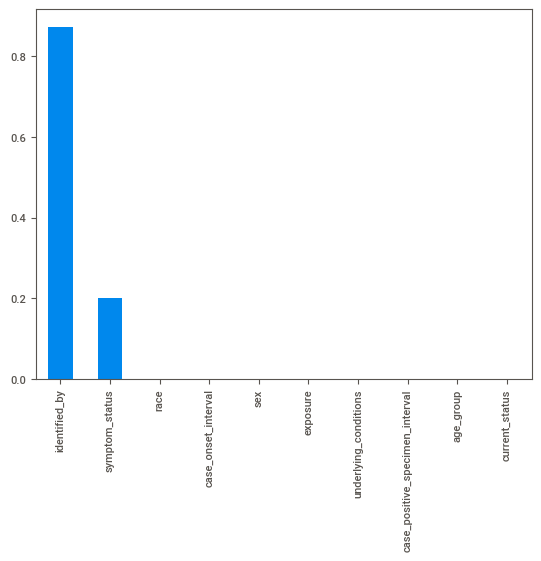

In [79]:
#if p value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [80]:
Crosstabresult = pd.crosstab(index=data3['age_group'],columns=data3['hospitalized'])
print(Crosstabresult)

hospitalized        No    Yes
age_group                    
0 - 17 years     18205    483
18 to 49 years  100219   6835
50 to 64 years   48058   7830
65+ years        32928  14407


In [81]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(Crosstabresult)
# P value is the probability of H0 being true
# if P value is > 0.05 then only we accept the assumpion (H0)
# H0 = the variables are not correlated with each other
print ('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


In [82]:
data4.head()

date  state  age_group  sex  race  case_positive_specimen_interval  \
0  2020-05-01     21          1    1     5                              1.0   
2  2021-05-01     21          1    0     5                              1.0   
8  2020-11-01     21          1    1     5                              0.0   
13 2020-05-01     22          1    1     5                              0.0   
15 2020-05-01      6          0    0     5                              0.0   

    case_onset_interval  identified_by  exposure  current_status  \
0                   0.0              3         1               0   
2                   0.0              0         1               1   
8                   0.0              2         1               0   
13                  0.0              0         1               0   
15                  0.0              1         1               0   

    symptom_status  icu_needed  patient_died  underlying_conditions  \
0                1           0             0                      1   
2                1           0             0                      1   
8                1           0             0                      1   
13               1           0             0                      1   
15               1           0             0                      1   

    hospitalized  
0              0  
2              0  
8              0  
13             0  
15             0

In [83]:
import datetime
data4['Year'] = data4['date'].dt.year
data4['Month'] = data4['date'].dt.month

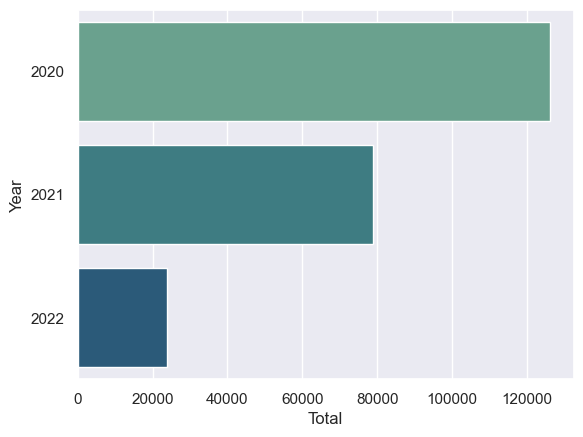

In [84]:
sns.set_theme(style='darkgrid')
sns.countplot(y='Year', data=data4, palette='crest')
plt.ylabel('Year')
plt.xlabel('Total')
plt.show()

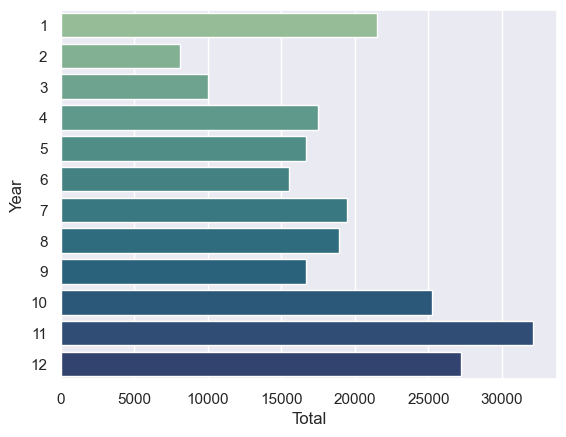

In [85]:
sns.set_theme(style='darkgrid')
sns.countplot(y='Month', data=data4, palette='crest')
plt.ylabel('Year')
plt.xlabel('Total')
plt.show()

In [86]:
data4.head()

date  state  age_group  sex  race  case_positive_specimen_interval  \
0  2020-05-01     21          1    1     5                              1.0   
2  2021-05-01     21          1    0     5                              1.0   
8  2020-11-01     21          1    1     5                              0.0   
13 2020-05-01     22          1    1     5                              0.0   
15 2020-05-01      6          0    0     5                              0.0   

    case_onset_interval  identified_by  exposure  current_status  \
0                   0.0              3         1               0   
2                   0.0              0         1               1   
8                   0.0              2         1               0   
13                  0.0              0         1               0   
15                  0.0              1         1               0   

    symptom_status  icu_needed  patient_died  underlying_conditions  \
0                1           0             0                      1   
2                1           0             0                      1   
8                1           0             0                      1   
13               1           0             0                      1   
15               1           0             0                      1   

    hospitalized  Year  Month  
0              0  2020      5  
2              0  2021      5  
8              0  2020     11  
13             0  2020      5  
15             0  2020      5

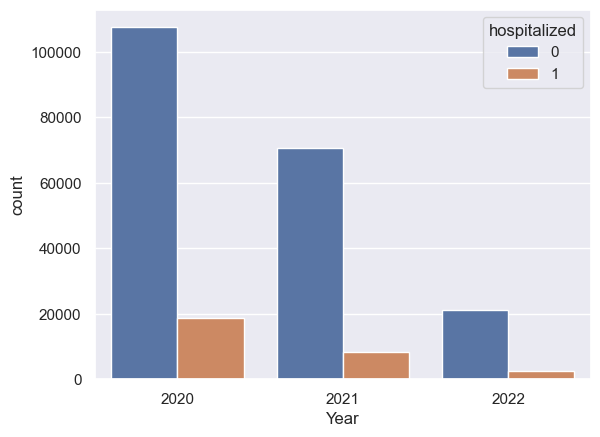

In [87]:
# a = data4['Year']
# b = data4['hospitalized']
# plt.bar(a,b)
# plt.show()

sns.countplot(x='Year',hue='hospitalized',data=data4)
plt.show()

In [88]:
data5 =data4.copy()
data5.drop(columns=['date','Year','Month'],inplace=True)

In [89]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data5['hospitalized'] = enc.fit_transform(data5['hospitalized'])
data5['state'] = enc.fit_transform(data5['state'])
data5['sex'] = enc.fit_transform(data5['sex'])
data5['race'] = enc.fit_transform(data5['race'])
data5['age_group'] = enc.fit_transform(data5['age_group'])
data5['identified_by'] = enc.fit_transform(data5['identified_by'])
data5['exposure'] = enc.fit_transform(data5['exposure'])
data5['current_status'] = enc.fit_transform(data5['current_status'])
data5['symptom_status'] = enc.fit_transform(data5['symptom_status'])
data5['underlying_conditions'] = enc.fit_transform(data5['underlying_conditions'])
data5['case_positive_specimen_interval'] = enc.fit_transform(data5['case_positive_specimen_interval'])
data5['case_onset_interval'] = enc.fit_transform(data5['case_onset_interval'])

In [90]:
data5.head()

state  age_group  sex  race  case_positive_specimen_interval  \
0      21          1    1     5                                2   
2      21          1    0     5                                2   
8      21          1    1     5                                0   
13     22          1    1     5                                0   
15      6          0    0     5                                0   

    case_onset_interval  identified_by  exposure  current_status  \
0                     0              3         1               0   
2                     0              0         1               1   
8                     0              2         1               0   
13                    0              0         1               0   
15                    0              1         1               0   

    symptom_status  icu_needed  patient_died  underlying_conditions  \
0                1           0             0                      1   
2                1           0             0                      1   
8                1           0             0                      1   
13               1           0             0                      1   
15               1           0             0                      1   

    hospitalized  
0              0  
2              0  
8              0  
13             0  
15             0

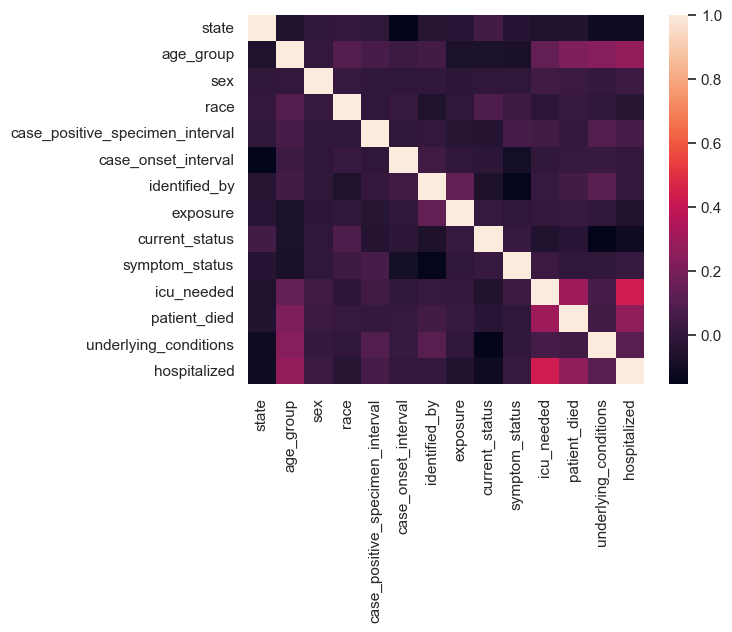

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data5.iloc[:, :].corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()

In [92]:
from sklearn.feature_selection import chi2

res = chi2(data5.iloc[:, :13], data5['hospitalized'])
features = pd.DataFrame({
    'features': data5.columns[:13],
    'chi2': res[0],
    'p-value': res[1]
})

In [93]:
features

features          chi2        p-value
0                             state   2471.769591   0.000000e+00
1                         age_group   9030.150002   0.000000e+00
2                               sex    144.386553   2.924675e-33
3                              race     66.053231   4.389077e-16
4   case_positive_specimen_interval    809.806904  3.979969e-178
5               case_onset_interval     36.152438   1.824701e-09
6                     identified_by      0.025622   8.728261e-01
7                          exposure    151.475992   8.248084e-35
8                    current_status   2255.114446   0.000000e+00
9                    symptom_status      1.646502   1.994357e-01
10                       icu_needed  41852.303344   0.000000e+00
11                     patient_died  14950.645337   0.000000e+00
12            underlying_conditions    300.508235   2.552962e-67

In [94]:
import pandas as pd
import researchpy as rp

In [95]:
rp.summary_cat(data5[['age_group','hospitalized']])

Variable  Outcome   Count  Percent
0     age_group        1  107054    46.76
1                      2   55888    24.41
2                      3   47335    20.67
3                      0   18688     8.16
4  hospitalized        0  199410    87.09
5                      1   29555    12.91

In [96]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228965 entries, 0 to 562281
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   state                            228965 non-null  int64
 1   age_group                        228965 non-null  int64
 2   sex                              228965 non-null  int64
 3   race                             228965 non-null  int64
 4   case_positive_specimen_interval  228965 non-null  int64
 5   case_onset_interval              228965 non-null  int64
 6   identified_by                    228965 non-null  int64
 7   exposure                         228965 non-null  int64
 8   current_status                   228965 non-null  int64
 9   symptom_status                   228965 non-null  int64
 10  icu_needed                       228965 non-null  int8 
 11  patient_died                     228965 non-null  int8 
 12  underlying_conditions         

In [97]:
from statsmodels.formula.api import ols

data5["Hospitalized"] = data5["hospitalized"]

model = ols("Hospitalized ~ C(age_group, Sum) + C(sex, Sum) + C(race, Sum)+ C(state, Sum)+ C(case_positive_specimen_interval, Sum)+ C(case_onset_interval, Sum)+ C(identified_by, Sum)+ C(exposure, Sum)+ C(current_status, Sum)+ C(symptom_status, Sum)+ C(underlying_conditions, Sum)", data=data5).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

sum_sq        df            F  \
Intercept                                   19.994207       1.0   248.528391   
C(age_group, Sum)                         1148.953041       3.0  4760.503052   
C(sex, Sum)                                 13.127034       1.0   163.169290   
C(race, Sum)                                35.842130       5.0    89.103678   
C(state, Sum)                             4070.592409      25.0  2023.901785   
C(case_positive_specimen_interval, Sum)     60.681347       6.0   125.711724   
C(case_onset_interval, Sum)                125.345477      73.0    21.343106   
C(identified_by, Sum)                       49.602885       7.0    88.080693   
C(exposure, Sum)                           144.007528       1.0  1790.016443   
C(current_status, Sum)                      67.191760       1.0   835.194907   
C(symptom_status, Sum)                      98.916495       1.0  1229.534006   
C(underlying_conditions, Sum)               35.194978       1.0   437.474276   
Residual                                 18410.268205  228840.0          NaN   

                                                PR(>F)  
Intercept                                 5.818172e-56  
C(age_group, Sum)                         0.000000e+00  
C(sex, Sum)                               2.366018e-37  
C(race, Sum)                              5.633000e-94  
C(state, Sum)                             0.000000e+00  
C(case_positive_specimen_interval, Sum)  2.152936e-159  
C(case_onset_interval, Sum)              3.964775e-276  
C(identified_by, Sum)                    9.910597e-129  
C(exposure, Sum)                          0.000000e+00  
C(current_status, Sum)                   2.577507e-183  
C(symptom_status, Sum)                   1.209649e-268  
C(underlying_conditions, Sum)             4.734191e-97  
Residual                                           NaN

In [98]:
model = ols("Hospitalized ~ C(age_group, Sum) + C(sex, Sum) + C(race, Sum)+ C(state, Sum)+ C(identified_by, Sum)+ C(exposure, Sum)+ C(current_status, Sum)+ C(symptom_status, Sum)+ C(underlying_conditions, Sum)", data=data5).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

sum_sq        df            F  \
Intercept                         38.917048       1.0   479.247309   
C(age_group, Sum)               1227.967865       3.0  5040.638383   
C(sex, Sum)                       11.964456       1.0   147.337317   
C(race, Sum)                      46.000265       5.0   113.294838   
C(state, Sum)                   4260.808320      25.0  2098.803519   
C(identified_by, Sum)             49.384369       7.0    86.878290   
C(exposure, Sum)                 148.302690       1.0  1826.286140   
C(current_status, Sum)            71.443015       1.0   879.791112   
C(symptom_status, Sum)            16.392762       1.0   201.870073   
C(underlying_conditions, Sum)     24.635917       1.0   303.381099   
Residual                       18589.257568  228919.0          NaN   

                                      PR(>F)  
Intercept                      4.006483e-106  
C(age_group, Sum)               0.000000e+00  
C(sex, Sum)                     6.783027e-34  
C(race, Sum)                   4.999446e-120  
C(state, Sum)                   0.000000e+00  
C(identified_by, Sum)          6.368215e-127  
C(exposure, Sum)                0.000000e+00  
C(current_status, Sum)         5.650081e-193  
C(symptom_status, Sum)          8.536049e-46  
C(underlying_conditions, Sum)   6.684354e-68  
Residual                                 NaN